<b>Research on video games</b>

Company: Ice, an online video game store that sells video games all over the world. 

Target: To study data collected over the last few years and determine which factors influence whether a game is successful based on expert, user, and critic reviews.  

The target of this project not only the factors that influence the successful or not but also how the data can be used to plan future advertisements of video games.

<b>Table of contents</b>
1. [Step 1. Open the data file and study the general information](#step1)
2. [Step 2. Data Preprocessing](#step2)
3. [Step 3. Make calculations and add them to the table](#step3)
4. [Step 4. Create a user profile for each region](#step4)
5. [Step 5. Test the following Hypotheses](#step5)
6. [Overall Conclusion](#conclusion)

<b>Step 1. Open the data file and study the general information. <a name="step1"></a></b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns 
from scipy.stats import levene

try:
    data = pd.read_csv("/datasets/games.csv")
except:
    print ("Could not open/read file:", data)
    sys.exit()

def get_information(df):
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na_df(df,4))
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicate:')
    print('We have {} duplicated rows.'.format(df.duplicated().sum()))
    
def get_percent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

def get_percent_of_na(df):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count == 1
        print('Column {} has {.{}%} percent of nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
    
    if count !=0:
        print('There are {} columns with NA'.format(count))
    else:
        print()
        print('There are no colums with NA')
        
get_information(data)

Head:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990



Columns with nulls:


,Missing Values,Percent of Nulls
Name,2,0.01
Platform,0,0.00
Year_of_Release,269,1.61
Genre,2,0.01
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00
Other_sales,0,0.00
Critic_Score,8578,51.32
User_Score,6701,40.09


----------------------------------------------------------------------------------------------------
Shape:
(16715, 11)
----------------------------------------------------------------------------------------------------
Duplicate:
We have 0 duplicated rows.


<b>Conclusion</b>
<br></br>

<p><b>Missing values:</b> 
There are a lot of missing values in the critic score, user score, and rating. There are a small number of missing values for name, year of release, and genre.</p> 
<p><b>Duplicate values:</b>
There are no duplicate values in the data set.</p>

<b>Step 2. Data preprocessing <a name="step2"></a></b>
- [X] Replace the column names (make them lowercase). 
- [X] Convert the data to the required types.
- [X] Describe the columns where the data types have been changed and why.
- [X] If necessary, decide how to deal with missing values:
- [X] Explain why you filled in the missing values as you did or why you decided to leave them blank.
- [X] Why do you think the values are missing? Give possible reasons.
- [X] Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- [X] Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [2]:
data.columns = data.columns.str.lower()

In [3]:
data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release'].median())

data.dropna(subset=['name'], inplace=True)

data.dropna(subset=['genre'], inplace=True)

In [4]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = pd.to_numeric(data['user_score'].replace('tbd',np.nan))

In [5]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<b>Conclusion</b>
<br></br>
<p>I changed the all the column's names to lower case to make it easier to read and get rid of camel case.</p>

<p>For missing values for the year of release and I took the median value filled in the missing data. This is to make sure that the dataset is not skewed. For the missing values for name and genre because there were only two I decided to drop these rows from the table. However, for the missing values for critic score, user score, and rating I decided to not fill in the missing values because there is 40%-50% of the data missing. This data could possibly be missing because these video games are have not been critiqued by a user or critic.</p>

<p>The year column was float and needed to be changed to int because you cannot have a decimal in a year. The user score column was a string and needed to be changed to a float. The reason that the user score column was a string was because of the 'tbd' value. To fix this and change to a float I set the 'tbd' values to nan. The 'tbd' value in the user score column can account for some of the missing values that we saw earlier. The user scores are still to be determined.</p>

<p>To calculate the total sales, I added all the sales columns together and put the result in a seperate column called total sales. </p>

<b>Step 3. Analyze the data <a name="step3"></a></b>
   
- [X] Look at how many games were released in different years. Is the data for every period significant?
- [X] Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- [X] Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- [X] Work only with the data that you've decided is relevant. Disregard the data for previous years.
- [X] Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- [X] Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- [X] Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- [X] Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- [X] Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales? 

In [6]:
# to look at how many different games were released each year 
data.groupby('year_of_release').name.count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

There were not that many video games before 1994. After 1994 there is an increase in video games especially in 2006 where the number hit the thousands. In 2012, there was a decrease in the number of video games that continues into 2016.

In [7]:
game_platforms = data.groupby(['platform']).total_sales.sum().sort_values(ascending=False)
game_platforms.head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

The platforms with the highest total sales overall are:
1. PS2     1255.77
2. X360     971.42
3. PS3      939.65
4. Wii      907.51
5. DS       806.12

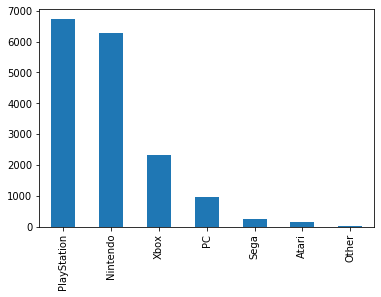

In [8]:
dict = {'PS2':'PlayStation',
        'X360':'Xbox',
        'PS3':'PlayStation',
        'Wii':'Nintendo',
        'DS':'Nintendo',
        'PS':'PlayStation',
        'GBA':'Nintendo',
        'PS4':'PlayStation',
        'PSP':'PlayStation',
        'PC':'PC',
        '3DS':'Nintendo',
        'XB':'Xbox', 
        'GB':'Nintendo',
        'NES':'Nintendo',
        'N64':'Nintendo',     
        'SNES':'Nintendo',
        'GC':'Nintendo',
        'XOne':'Xbox',            
        '2600':'Atari',
        'WiiU':'Nintendo',
        'PSV':'PlayStation',
        'SAT':'Sega',
        'GEN':'Sega',
        'DC':'Sega',
        'SCD':'Sega',
        'NG':'Other',
        'WS':'Other',
        'TG16':'Other',
        '3DO':'Other',
        'GG':'Sega',
        'PCFX':'Other'}

data['platform_type'] = data['platform'].map(dict)
data['platform_type'].value_counts().plot(kind='bar')
plt.show()

After grouping together the platform, the data shows that the Playstation and Nintendo are the top companies for video game consoles. 

In [9]:
# To calculate highest platforms by year of release
game_platforms = data.groupby(['year_of_release','platform']).total_sales.sum().unstack(1)
game_platforms.head()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


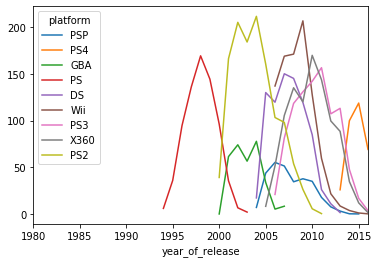

In [10]:
top_platforms = game_platforms.sum().sort_values().index[-9:]
game_platforms[top_platforms].plot()
plt.show()

This graph shows the decline of some on the video game platforms. For example, some of the top platforms that used to be popular but now have zero sales such as the PS, the PS2, and the Wii. Because of this decline in video game platforms we only want to focus on the data since 2014. 

In [11]:
data = data[data.year_of_release <= 2014]

This uses the data of video game platforms with a year of release before 2014. 

In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Nintendo
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Nintendo


In [13]:
data.groupby(['year_of_release', 'platform']).total_sales.sum().unstack(1)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
game_platforms = data.groupby(['platform']).total_sales.sum().sort_values(ascending=False)
game_platforms.head()

platform
PS2     1255.77
X360     957.94
PS3      919.23
Wii      906.19
DS       806.12
Name: total_sales, dtype: float64

By grouping the data by platform and the sum of total sales we can see that the Xbox 360 is one of the top platforms leading in sales with $971.42 in total sales.

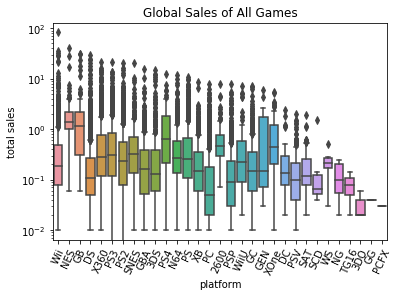

In [15]:
sns.boxplot(data=data, x='platform', y='total_sales')
plt.title("Global Sales of All Games") 
plt.xlabel('platform')  
plt.ylabel('total sales') 
plt.yscale('log')
plt.xticks(rotation=65);

The box plot for the global sales of all games, broken down by platform shows that the differences in sales is significant. The median value varies for each platform.

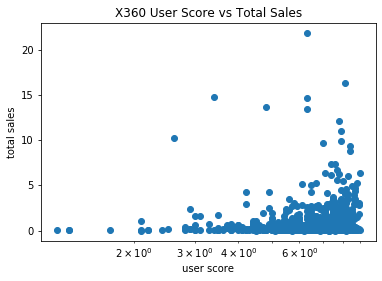

In [16]:
plt.scatter(data[data.platform=='X360']['user_score'], data[data.platform=='X360']['total_sales'])
plt.title("X360 User Score vs Total Sales") 
plt.xlabel('user score')
plt.ylabel('total sales')
plt.xscale('log')

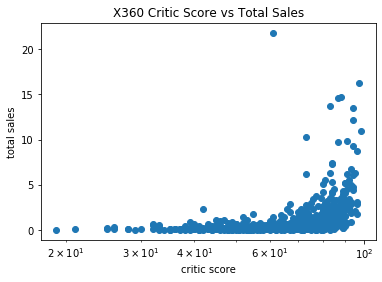

In [17]:
plt.scatter(data[data.platform=='X360']['critic_score'], data[data.platform=='X360']['total_sales'])
plt.title("X360 Critic Score vs Total Sales")
plt.xlabel('critic score')
plt.ylabel('total sales')
plt.xscale('log')

In [18]:
data[data.platform=='X360'].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,0.021249,0.084136,-0.092687,0.032913,0.000936,-0.190479,0.039860
na_sales,0.021249,1.000000,0.855002,0.482169,0.964318,0.378056,0.104191,0.984395
eu_sales,0.084136,0.855002,1.000000,0.458785,0.948339,0.384803,0.107424,0.932467
jp_sales,-0.092687,0.482169,0.458785,1.000000,0.497823,0.281351,0.178555,0.502933
other_sales,0.032913,0.964318,0.948339,0.497823,1.000000,0.402375,0.120317,0.992411
critic_score,0.000936,0.378056,0.384803,0.281351,0.402375,1.000000,0.618101,0.393736
user_score,-0.190479,0.104191,0.107424,0.178555,0.120317,0.618101,1.000000,0.111375
total_sales,0.039860,0.984395,0.932467,0.502933,0.992411,0.393736,0.111375,1.000000


I chose to use the XBox 360 for the gaming platform because it was one of the most popular. By using the correlation table we can see that the correlation for the critic score and total sales is 40%. This is a significant and shows that the critic score can impact how many video game total sales. The correlation for the user score and total sales is 11%, which is lower than critic score and may not have as much as an impact. 

In [19]:
data.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_type
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Nintendo
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,Nintendo
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,PlayStation
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81,PlayStation
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,PC
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01,PC
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01,Nintendo
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,PlayStation


In [20]:
game = data.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.).groupby(['name', 'platform']).total_sales.sum().unstack(1)
game

platform,2600,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Frozen: Olaf's Quest,NaN,0.59,NaN,0.51,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007: Quantum of Solace,NaN,NaN,NaN,0.13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.65,NaN,1.48,NaN,NaN
007: The World is not Enough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11eyes: CrossOver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN
18 Wheeler: American Pro Trucker,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iCarly,NaN,NaN,NaN,0.72,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN,NaN,NaN
iCarly 2: iJoin The Click!,NaN,NaN,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN
nail'd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN


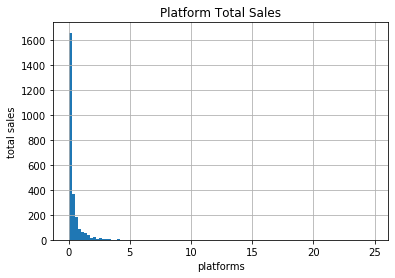

In [21]:
game.std(1).hist(bins=100)
plt.title("Platform Total Sales") 
plt.xlabel('platforms')  
plt.ylabel('total sales')
plt.show()

This chart shows that the standard deviation of sales over different platforms are very close to zero. This means that sales across various platforms are similar to each other. 

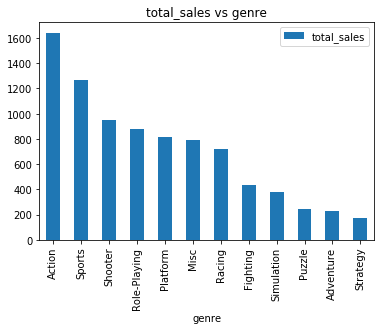

In [22]:
genres = data.groupby('genre').agg({'total_sales' : 'sum'}).sort_values(by='total_sales', ascending=False)
genres.plot(kind='bar', y='total_sales', title='total_sales vs genre')
plt.show()

<b>Conclusion</b>
<br></br>

<p>This chart shows that the most profitable genres are action, sports, shooter. These genres are first person games and that may be a contributing factor to as why they are most popular. The least popular genres are adventure, puzzle, and strategy. These genres emphasize skillful thinking and planning to achieve victory.</p>

<p>The data shows that sales across various platforms are similar to each other. This means that companies do not focus on this factor widely when making advertising decisions. </p>

<p>By using the correlation table we can see that the correlation for the critic score and total sales is 40%. This is a significant and shows that the critic score can impact how many video game total sales. The correlation for the user score and total sales is 11%, which is lower than critic score and may not have as much as an impact. </p>


<b>Step 4. Create a user profile for each region. <a name="step4"></a></b>

In [23]:
platform_sales = data.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
platform_sales

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
2600,90.60,5.47,0.00,0.91
3DO,0.00,0.00,0.10,0.00
3DS,73.18,54.09,77.12,11.69
DC,5.43,1.69,8.56,0.27
DS,382.40,188.89,175.57,59.26
GB,114.32,47.82,85.12,8.20
GBA,187.54,75.25,47.33,7.73
GC,133.46,38.71,21.58,5.18
GEN,19.27,5.52,2.67,0.89


In [24]:
platform_sales.na_sales.nlargest(5)

platform
X360    594.42
PS2     583.84
Wii     496.41
PS3     387.83
DS      382.40
Name: na_sales, dtype: float64

The top platforms in North America with the most sales are X360, Wii, PS3, DS, and PS2. 

In [25]:
platform_sales.eu_sales.nlargest(5)

platform
PS2     339.29
PS3     322.99
X360    266.55
Wii     261.48
PS      213.61
Name: eu_sales, dtype: float64

The top platforms in Europe with the most sales are PS3, X360, Wii, DS, and PS2. These are the same platforms as North America in a different order.

In [26]:
platform_sales.jp_sales.nlargest(5)

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
NES      98.65
Name: jp_sales, dtype: float64

The top platforms in Japan with the most sales are DS, 3DS, PS3, PSP, and PS2. This is different than North America and Europe.  

In [27]:
genre_sales = data.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
genre_sales

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,845.33,484.31,138.38,174.02
Adventure,101.42,58.87,50.08,15.24
Fighting,217.82,96.61,85.94,34.79
Misc,401.69,208.48,104.92,73.25
Platform,441.72,197.15,129.41,50.21
Puzzle,122.81,49.88,56.79,12.37
Racing,356.53,229.99,56.42,74.87
Role-Playing,310.99,171.50,342.00,54.25
Shooter,544.06,277.06,34.97,90.63


In [28]:
genre_sales.na_sales.nlargest(5)

genre
Action      845.33
Sports      658.12
Shooter     544.06
Platform    441.72
Misc        401.69
Name: na_sales, dtype: float64

In [29]:
genre_sales.eu_sales.nlargest(5)

genre
Action     484.31
Sports     348.97
Shooter    277.06
Racing     229.99
Misc       208.48
Name: eu_sales, dtype: float64

In [30]:
genre_sales.jp_sales.nlargest(5)

genre
Role-Playing    342.00
Action          138.38
Sports          133.89
Platform        129.41
Misc            104.92
Name: jp_sales, dtype: float64

<b>Conclusion</b>
<br></br>
In North America and Europe the top three genres are action, sports, and shooter. However, in Japan the top genre is Role-Playing. This is mostly likely due to the cultural differences. Japanese games are more heavily story and character-focused than American or European games. Japanese games also have central female characters which make the games appeal to a wider general audience. 

<b>Step 5. Test the following Hypotheses<a name="step5"></a></b>

<b>Average user ratings of the Xbox One and PC platforms are the same.</b>

<p>Null Hypothesis: The average user ratings by the platform Xbox One and PC are the same</p>

<p>Alternative Hypothesis: The average user ratings by Xbox One and PC platform are not the same</p>

In [31]:
alpha = 0.05

xbox_one_user = data.query('platform == "XOne"')['user_score']
pc_user = data.query('platform == "PC"')['user_score']
result = stats.ttest_ind(xbox_one_user, pc_user, axis=0, equal_var=False, nan_policy='omit')
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

print(result.pvalue)


We reject the null hypothesis
0.00011810275545158012


I changed equal_var from True to False

In [32]:
xbox_one_user.mean() , pc_user.mean()

(6.480327868852459, 7.156268221574345)

The mean score here indicates that these are different. The t-test confirms our suspicion that there appears to be a difference here. Given the p-value we reject the null hypothesis. This means that the average user ratings by the platform Xbox One and PC are not the same.

<b>Average user ratings for the Action and Sports genres are different. Set the alpha threshold value yourself.</b>

<p>Null Hypothesis: The average user rating of action genre is equal to sports genre</p>
<p>Alternative Hypothesis: The average user rating of action genre is not equal to sports genre</p>

In [33]:
alpha = 0.05

action_user = data.query('genre == "Action"')['user_score']
sports_user = data.query('genre == "Sports"')['user_score']

In [34]:
result = stats.ttest_ind(action_user, sports_user, equal_var=False, nan_policy='omit')

if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")
print(result.pvalue)

We cannot reject the null hypothesis
0.736486225972788


In [35]:
action_user.mean() , sports_user.mean()

(7.083017715332927, 7.102742409402546)

The mean score here indicates that these are not different. The t-test confirms our suspicion that there appears to be no difference here. Given the p-value we cannot reject the null hypthesis. This means that the average user rating of action genre is equal to sports genre.

<b>Overall Conclusion<a name="conclusion"></a></b>
<p>There are a lot of missing values in the critic score, user score, and rating. There are a small number of missing values for name, year of release, and genre. These missing values are important in the data and may need to be dropped or filled in depending on the data set.</p>

<p>Looking into the data it shows that there were not that many video games before 1994. After 1994 there is an increase in video games especially in 2006 where the number hit the thousands. In 2012, there was a decrease in the number of video games that continues into 2016. It is important to study the trends in video games from the past to determine the future.</p>

<p>After grouping together the platform, the data shows that the Playstation and Nintendo are the top companies for video game consoles. I chose to use the XBox 360 to look at correlations because it was one of the most popular gaming platforms. By using the correlation table we can see that the correlation for the critic score and total sales is 40%. This is a significant and shows that the critic score can impact how many video game total sales. The correlation for the user score and total sales is 11%, which is lower than critic score and may not have as much as an impact.</p>

<p>This chart shows that the most profitable genres are action, sports, shooter. These genres are first person games and that may be a contributing factor to as why they are most popular. The least popular genres are adventure, puzzle, and strategy. These genres emphasize skillful thinking and planning to achieve victory. It is important to know which video game genres are the most popular to implement supply and demand.</p>

<p>The top platforms and popular genres vary in geographic locations. For example, in North America and Europe with the most sales are X360, Wii, PS3, DS, and PS2.The top platforms in Japan with the most sales are DS, 3DS, PS3, PSP, and PS2. This is different than North America and Europe.  In North America and Europe the top three genres are action, sports, and shooter. However, in Japan the top genre is Role-Playing. By knowing which platforms and genres are popular in specific geographic location advertisting can become more personalized. </p>

Analysis: Ice should advertise the top platforms and video games based on the geographic locations. Different ads may work better in different countries based on the data. Ice should also promote more first person video games such as action and shooting. This video gams have the highest profits in majority of the geographic locations. Lastly, Ice should pay attention to how old a video game and platform is. After about 6 years video games lose popularity and total sales fall significantly. 